In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv("train.csv", encoding="ISO-8859-1", on_bad_lines="skip")


In [32]:
df.shape

(6899, 6)

In [33]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0.0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0.0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0.0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0.0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0.0


In [35]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
410,410,818,819,How much does your DNA change over time? If I ...,How much can a person's DNA change from birth ...,1.0
2809,2809,5573,5574,When will China become a democratic country?,Is China a democratic country?,0.0
6820,6820,13348,13349,Where Can My Business Capital injection Come F...,From where can my capital injection originate?,1.0
5098,5098,10046,10047,What are the advantages and disadvantages of w...,What are the advantages and disadvantages of w...,1.0
3412,3412,6763,6764,What is the best MongoDB ORM for node.js?,What's the best MongoDB ORM for Python?,0.0
1133,1133,2258,2259,How long is the recovery time after wisdom tee...,Why is it important to rinse with salt water a...,0.0
2207,2207,4391,4392,What are the best workout songs?,Which are the best workout songs?,1.0
4794,4794,9466,9467,"Where is the Baraka River located, and how doe...","Where is the Baraka River located, and how doe...",0.0
2011,2011,4001,4002,What does Java do and do I need it?,Do I need Java on my computer?,1.0
608,608,1214,1215,Can World War 3 ever take place?,Is World War 3 more imminent than expected?,1.0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6899 entries, 0 to 6898
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            6899 non-null   int64  
 1   qid1          6899 non-null   int64  
 2   qid2          6899 non-null   int64  
 3   question1     6899 non-null   object 
 4   question2     6899 non-null   object 
 5   is_duplicate  6898 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 323.5+ KB


In [36]:
#missing values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    1
dtype: int64

In [37]:
#duplicate rows
df.duplicated().sum()

0

is_duplicate
0.0    4301
1.0    2597
Name: count, dtype: int64
is_duplicate
0.0    62.351406
1.0    37.648594
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

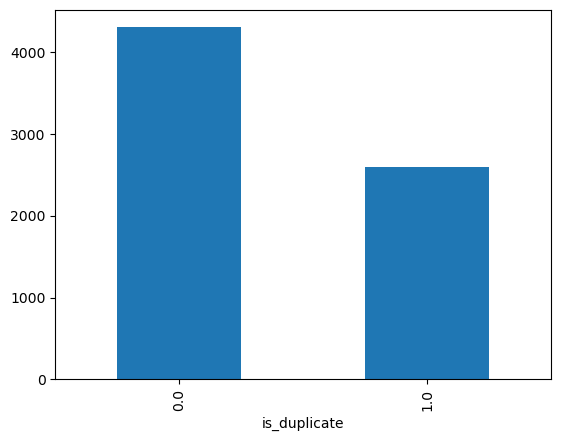

In [40]:
#Number of Questions Duplicates and Number of Questions Duplicates
print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [41]:
# Repeated questions- Question1 + Question 2

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 13501
Number of questions getting repeated 281


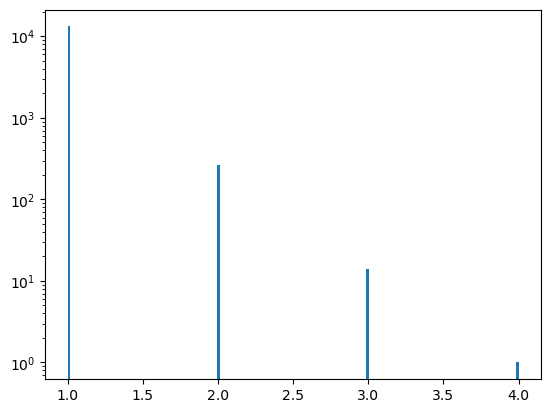

In [42]:
# Repeated questions histogram
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()